In [9]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape
import keras.backend as K
import math


#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs
import xmltodict

import imgaug as ia
from imgaug import augmenters as iaa
import math



import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,RepeatVector,Dot
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape,merge,Concatenate,Add,Dropout
import keras.backend as K
import math
from keras.activations import softmax,tanh
import tensorflow as tf
from keras.applications.vgg16 import VGG16


from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D,Softmax
from keras.preprocessing import sequence

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
class CustomModelCheckpoint(ModelCheckpoint):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            #self.model.save_weights(filepath, overwrite=True)
                            print("asd")
                            try:
                                with open(filepath,'wb') as f:
                                    pickle.dump(self.model.get_weights(),f)
                            except Exception as ex:
                                print("Could not write",ex)
                        else:
                            self.model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.model.save_weights(filepath, overwrite=True)
                else:
                    self.model.save(filepath, overwrite=True)

In [11]:
# !pip install keras
#num_labels = len(np.unique(labels))

def iou_metric(y_true, y_pred):
    # iou as metric for bounding box regression
    # input must be as [x1, y1, x2, y2]
    
    # AOG = Area of Groundtruth box
    AoG = K.abs(K.transpose(y_true)[2] - K.transpose(y_true)[0] + 1) * K.abs(K.transpose(y_true)[3] - K.transpose(y_true)[1] + 1)
    
    # AOP = Area of Predicted box
    AoP = K.abs(K.transpose(y_pred)[2] - K.transpose(y_pred)[0] + 1) * K.abs(K.transpose(y_pred)[3] - K.transpose(y_pred)[1] + 1)

    # overlaps are the co-ordinates of intersection box
    overlap_0 = K.maximum(K.transpose(y_true)[0], K.transpose(y_pred)[0])
    overlap_1 = K.maximum(K.transpose(y_true)[1], K.transpose(y_pred)[1])
    overlap_2 = K.minimum(K.transpose(y_true)[2], K.transpose(y_pred)[2])
    overlap_3 = K.minimum(K.transpose(y_true)[3], K.transpose(y_pred)[3])

    # intersection area
    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)

    # area of union of both boxes
    union = AoG + AoP - intersection
    
    # iou calculation
    iou = intersection / union

    # bounding values of iou to (0,1)
    iou = K.clip(iou, 0.0 + K.epsilon(), 1.0 - K.epsilon())

    return iou    

In [12]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15619773457987852715, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10114550714142171152
 physical_device_desc: "device: XLA_CPU device"]

In [5]:
def process_image_keypoints(img,bbox_coords):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    bbox_coordinates = []
    for a,b in bbox_coords:
        a = float(a)*ratio
        b = float(b)*ratio
        bbox_coordinates.append([a+left,b+top])
    return new_im,bbox_coordinates

In [6]:
def process_image_keypoints_nobox(img):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im,[left,top,ratio]

In [7]:
count_correct = 0
count_wrong = 0
images = []
bboxes = []
image_sizes = []
image_names = []
for file in os.listdir("/tf/data/claw_annotations3/"):
    try:
        with open('/tf/data/claw_annotations3/'+file,'r') as f:
            text = f.read()
            d = xmltodict.parse(text)
        path = d['annotation']['path']
        rel_path = "/home/parmeet1992/Pictures/"
        
        path = path.split(rel_path)[1]
        path = "/tf/data/" + path
        bgr_img = cv2.imread(path)
        img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        
        obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
        bbox = obj['bndbox']                
        bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]


        img,bbox_coords = process_image_keypoints(img,bbox_coords)
        bbs = ia.BoundingBoxesOnImage([
            ia.BoundingBox(x1=bbox_coords[0][0], y1=bbox_coords[0][1], x2=bbox_coords[1][0], y2=bbox_coords[1][1])
        ], shape=img.shape)

        images.append(img)
        bboxes.append(bbs)
        count_correct += 1
    except Exception as ex:
        print(ex)
        count_wrong += 1

KeyboardInterrupt: 

In [ ]:
# idx = idx + 1
# plt.imshow(X_normalized[idx])

In [ ]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        sometimes(iaa.Affine(
            #translate_percent={"x": (-0.01, 0.01), "y": (-0.01, 0.01)}, # translate by -20 to +20 percent (per axis)
            #rotate=(-5, 5), # rotate by -45 to +45 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        iaa.SomeOf((0, 5),
            [
                #iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [ ]:
def augment_images(images,bboxes,times):
    all_bboxes = []
    
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    all_images = list(images)
    
    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    #print(len(all_images))
    #print(len(all_bboxes))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        
        all_images = all_images + list(image_aug)
        #all_image_sizes = all_image_sizes + list(image_sizes)
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_bboxes

In [ ]:
X_normalized = [(x[:,:,:].astype(np.float64)) / 255.0 for x in images]
X_train, X_test, y_train, y_test = train_test_split(X_normalized,bboxes,test_size=0.33,random_state=42,shuffle=True)
test_bboxes = []
for bbs in list(y_test):
    test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
train_images,train_bboxes = augment_images(X_train,y_train,2)

In [10]:
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    if layer.name=='block5_conv3':
        break
    layer.trainable = False

x = cnn_base.get_layer('block5_pool').output
x = Conv2D(128, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, kernel_size=(3, 3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(4, kernel_size=(1, 1), padding="same")(x)
x = Reshape((4,),name='localization_output')(x)


model = Model(inputs=cnn_base.input, outputs=x)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy',iou_metric])
initial_weights = model.get_weights()

W0410 13:58:49.350608 140719041976064 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [32]:
try:
    with open('vgg16-crusher-box-weights_16.hd5','rb') as f:
        model_weights = pickle.load(f)
        model.set_weights(model_weights)
        print("loaded weights")
except:
    print("not present")
checkpoint = CustomModelCheckpoint('vgg16-crusher-box-weights_16.hd5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True,mode='min')
callbacks_list = [checkpoint]
history = model.fit(np.array(train_images),np.array(train_bboxes),validation_data=(np.array(X_test),np.array(test_bboxes)),epochs=20,batch_size=5,callbacks=callbacks_list)

loaded weights
Train on 408 samples, validate on 67 samples
Epoch 1/20
408/408 [==============================] - 7s 17ms/step - loss: 117.9627 - acc: 0.9804 - iou_metric: 0.7280 - val_loss: 52.2978 - val_acc: 0.9851 - val_iou_metric: 0.8016

Epoch 00001: val_loss improved from inf to 52.29784, saving model to vgg16-crusher-box-weights_16.hd5
asd
Epoch 2/20
408/408 [==============================] - 6s 16ms/step - loss: 140.3986 - acc: 0.9657 - iou_metric: 0.7148 - val_loss: 56.1273 - val_acc: 0.9851 - val_iou_metric: 0.7941

Epoch 00002: val_loss did not improve from 52.29784
Epoch 3/20
408/408 [==============================] - 7s 16ms/step - loss: 110.8450 - acc: 0.9730 - iou_metric: 0.7300 - val_loss: 155.0067 - val_acc: 0.9851 - val_iou_metric: 0.6558

Epoch 00003: val_loss did not improve from 52.29784
Epoch 4/20
408/408 [==============================] - 7s 16ms/step - loss: 135.7393 - acc: 0.9779 - iou_metric: 0.7217 - val_loss: 94.5280 - val_acc: 0.9851 - val_iou_metric: 0.733

KeyboardInterrupt: 

In [11]:
with open('vgg16-crusher-box-weights_16.hd5','rb') as f:
    model_weights = pickle.load(f)
    model.set_weights(model_weights)
    print("loaded weights")

loaded weights


In [84]:
# labels_dict

In [12]:
df = pd.read_csv('/tf/data/labels.csv')
df2 = pd.read_csv('/tf/data/gender.csv')

labels_dict = {}

for idx,row in df.iterrows():
    labels_dict['visit2'+str(row['id'])] = row['crusher']
for idx,row in df2.iterrows():
    labels_dict['visit1'+str(row['id'])] = row['claw']

In [13]:
count_correct = 0
count_wrong = 0
images = []
labels = []
image_sizes = []
image_names = []


# folders = ['/tf/data/aggression/tangier_lobster/']
# for folder in folders:
#     for file in os.listdir(folder):
#         try:
#             bgr_img = cv2.imread(folder+"/"+file)
#             img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
#             label = file.split(".")[0].split("_")[0]
            
#             img_temp,corr = process_image_keypoints_nobox(img)
#             img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
            
#             [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
#             [left,top,ratio] = corr
#             xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
#             ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            
            
#             img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
#             image_temp,_= process_image_keypoints_nobox(img)
#             if 'visit1'+label in labels_dict:
#                 images.append(image_temp)
#                 labels.append(labels_dict['visit1'+label])
#             count_correct += 1
#         except Exception as ex:
#             print(ex)
#             count_wrong += 1

folders = ['/tf/data/aggression/tangier_visit2_dslr','/tf/data/aggression/tangier-visit2']
for folder in folders:
    for file in os.listdir(folder):
        try:
            bgr_img = cv2.imread(folder+"/"+file)
            label = file.split(".")[0].split("_")[0]
            
            
            img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
            img_temp,corr = process_image_keypoints_nobox(img)
            img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
            
            [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
            [left,top,ratio] = corr
            xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
            ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            
            
            img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
            image_temp,_= process_image_keypoints_nobox(img)
            if 'visit2'+label in labels_dict:
                images.append(image_temp)
                labels.append(labels_dict['visit2'+label])
            count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [17]:
sum([lab=='R' for lab in labels])

192

In [131]:
def augment_images(images,labels,times):
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    
    all_images = list(images)
    all_labels = list(labels)
    
    
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels)        
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_labels

In [132]:
images_temp = [(x[:,:,:] / 255.0).astype(np.float64) for x in images]

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images_temp,labels):
    i = i + 1
    print(i)
    train_images,train_labels = augment_images(np.array(images_temp)[train],np.array(labels)[train],2)
    kfold_data.append([train_images,train_labels,np.array(images_temp)[test],np.array(labels)[test]])

1
2
3
4
5


In [133]:
with open('data-crusher0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-crusher1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-crusher2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-crusher3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-crusher4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [19]:
with open('data-crusher0.pckl','rb') as file:
    train_images,train_labels,test_images,test_labels = pickle.load(file)

In [28]:
len(test_labels)

72

In [7]:
def attention_block(x,K,labels,w,h):
    H = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    H = BatchNormalization()(H)
    spatial_softmax = Lambda(lambda x:softmax(H,axis=3))(H)
    O = Conv2D(labels*K, kernel_size=(w, h), padding="same")(x)
    O = BatchNormalization()(O)
    rH = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=3))(spatial_softmax)
    o = Lambda(lambda x: tf.einsum('bijk,bijk->bk',x[0],x[1]))([O,rH])
    tempH = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    tempH = BatchNormalization()(tempH)
    gh = Lambda(lambda x: softmax(tanh(tf.einsum('bijk,bijk->bk',x[0],x[1])),axis=1))([tempH,spatial_softmax])
    rgh = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=1))(gh)
    of = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([rgh,o])
    new_shape = Reshape((labels,K))(of)
    out = Lambda(lambda x: keras.backend.sum(x,axis=2))(new_shape)
    out = BatchNormalization()(out)
    out = Dense(labels,activation='sigmoid')(out)
    #x = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    #inter = Lambda(lambda x: Flatten()(keras.backend.mean(x,axis=3)))(x)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(x)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(inter)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    print(inter.shape)
    inter = Conv2D(1, kernel_size=(w, h), padding="same")(inter)
    inter = Flatten()(inter)
    weight = Dense(labels,activation='tanh')(inter)
    return out,weight

In [95]:
K = 7
labels = 1
w,h = 3,3

cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    if layer.name=='block5_conv3':
        break
    layer.trainable = False


x = cnn_base.get_layer('block3_conv3').output
final1,weight1 = attention_block(x,K,labels,w,h)
#final1 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final1,weight1])

x = cnn_base.get_layer('block4_conv3').output
final2,weight2 = attention_block(x,K,labels,w,h)

#final2 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final2,weight2])

x = cnn_base.get_layer('block5_pool').output
inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
weight3 = Dense(1,activation='tanh')(inter)

x = Flatten()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(64,activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(1,activation='sigmoid')(x)


weight_concat = Concatenate()([weight1,weight2,weight3])
weight_concat = Reshape((labels,3))(weight_concat)
weight_concat = Softmax(axis=2)(weight_concat)

final = Concatenate()([final1,final2,x])
final = Reshape((labels,3))(final)


sum_final = Lambda(lambda x: tf.einsum('bij,bij->bij',x[0],x[1]))([weight_concat,final])
sum_final = Lambda(lambda x: keras.backend.sum(x,axis=2))(sum_final)
sum_final = Dense(labels,activation='sigmoid')(sum_final)

model = Model(inputs=cnn_base.input, outputs=sum_final)

adam = keras.optimizers.Adam(lr=0.001)
#sgd = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

(?, 14, 14, 128)
(?, 7, 7, 128)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_23[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
_____________________________________________________________________________

In [51]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []



for i in range(5):
    eps = 80
    print("Loading file")
    with open('data-crusher'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('crusher-classification-attention-k7'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    train_ls = []
    for lb in train_labels:
        if lb=='L':
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for lb in test_labels:
        if lb=='L':
            test_ls.append(1)
        else:
            test_ls.append(0)
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_ls),train_ls)
    checkpoint = CustomModelCheckpoint('crusher-classification-attention-k7'+str(i)+'.hd5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    earlyStopping = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    callbacks_list = [checkpoint,earlyStopping]
    history = model.fit(x=np.array(train_images),y=np.array(train_ls),batch_size=5,epochs=eps,
        validation_data=(np.array(test_images),np.array(test_ls)),callbacks=callbacks_list,class_weight=class_weights)
#     history_record.append(history)
#     train_score = model.evaluate(x=np.array(train_images),y=np.array(train_ls),batch_size=5)
#     test_score = model.evaluate(x=np.array(test_images),y=np.array(test_ls),batch_size=5)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
    
#     print("predicting")
#     print("Test Score",test_score)
#     train_predictions = model.predict(x=np.array(train_images),batch_size=50)
#     test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
#     train_pred.append(train_predictions)
#     test_pred.append(test_predictions)

Loading file
loaded model
loaded
Train on 849 samples, validate on 72 samples
Epoch 1/80
849/849 [==============================] - 17s 20ms/step - loss: 0.3898 - acc: 0.9388 - val_loss: 0.5524 - val_acc: 0.7639

Epoch 00001: val_acc improved from -inf to 0.76389, saving model to crusher-classification-attention-k70.hd5
asd
Epoch 2/80
849/849 [==============================] - 10s 12ms/step - loss: 0.4218 - acc: 0.8916 - val_loss: 0.5553 - val_acc: 0.7361

Epoch 00002: val_acc did not improve from 0.76389
Epoch 3/80
849/849 [==============================] - 10s 11ms/step - loss: 0.3888 - acc: 0.9164 - val_loss: 0.5334 - val_acc: 0.7500

Epoch 00003: val_acc did not improve from 0.76389
Epoch 4/80
849/849 [==============================] - 10s 12ms/step - loss: 0.3994 - acc: 0.8975 - val_loss: 0.6517 - val_acc: 0.6250

Epoch 00004: val_acc did not improve from 0.76389
Epoch 5/80
849/849 [==============================] - 10s 11ms/step - loss: 0.3836 - acc: 0.9081 - val_loss: 0.5922 - v

Epoch 4/80
852/852 [==============================] - 10s 11ms/step - loss: 0.4803 - acc: 0.8791 - val_loss: 0.5866 - val_acc: 0.7465

Epoch 00004: val_acc improved from 0.71831 to 0.74648, saving model to crusher-classification-attention-k72.hd5
asd
Epoch 5/80
852/852 [==============================] - 10s 11ms/step - loss: 0.4633 - acc: 0.8897 - val_loss: 0.5932 - val_acc: 0.7042

Epoch 00005: val_acc did not improve from 0.74648
Epoch 6/80
852/852 [==============================] - 10s 11ms/step - loss: 0.4942 - acc: 0.8498 - val_loss: 0.7269 - val_acc: 0.5634

Epoch 00006: val_acc did not improve from 0.74648
Epoch 7/80
852/852 [==============================] - 10s 11ms/step - loss: 0.4361 - acc: 0.9085 - val_loss: 0.5618 - val_acc: 0.7746

Epoch 00007: val_acc improved from 0.74648 to 0.77465, saving model to crusher-classification-attention-k72.hd5
asd
Epoch 8/80
852/852 [==============================] - 10s 11ms/step - loss: 0.4534 - acc: 0.8815 - val_loss: 0.6401 - val_acc: 0


Epoch 00007: val_acc did not improve from 0.68571
Epoch 8/80
855/855 [==============================] - 10s 11ms/step - loss: 0.4827 - acc: 0.8807 - val_loss: 0.5774 - val_acc: 0.7571

Epoch 00008: val_acc improved from 0.68571 to 0.75714, saving model to crusher-classification-attention-k74.hd5
asd
Epoch 9/80
855/855 [==============================] - 10s 11ms/step - loss: 0.4656 - acc: 0.8971 - val_loss: 0.5724 - val_acc: 0.7571

Epoch 00009: val_acc did not improve from 0.75714
Epoch 10/80
855/855 [==============================] - 10s 11ms/step - loss: 0.4564 - acc: 0.9018 - val_loss: 0.6076 - val_acc: 0.7286

Epoch 00010: val_acc did not improve from 0.75714
Epoch 11/80
855/855 [==============================] - 10s 11ms/step - loss: 0.4544 - acc: 0.8760 - val_loss: 0.7132 - val_acc: 0.5571

Epoch 00011: val_acc did not improve from 0.75714
Epoch 12/80
855/855 [==============================] - 10s 11ms/step - loss: 0.4365 - acc: 0.9053 - val_loss: 0.7210 - val_acc: 0.5286

Epoch

In [97]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(5):
    with open('data-crusher'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('crusher-classification-attention-k7'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
    test_ls = []
    for lb in test_labels:
        if lb=='L':
            test_ls.append(1)
        else:
            test_ls.append(0)
    train_ls = []
    for lb in train_labels:
        if lb=='L':
            train_ls.append(1)
        else:
            train_ls.append(0)
    
    
    test_predictions = model.predict(np.array(test_images))
    test_f1.append(f1_score(test_ls,test_predictions>0.5,average='macro'))
    test_accuracy.append(accuracy_score(test_ls,test_predictions>0.5))
    
    train_predictions = model.predict(np.array(train_images))
    train_f1.append(f1_score(train_ls,train_predictions>0.5,average='macro'))
    train_accuracy.append(accuracy_score(train_ls,train_predictions>0.5))
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.std(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.std(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.std(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.std(test_f1))    
    #train_predictions = model.predict(np.array(train_images))
    #train_f1.append(f1_score(train_ls,train_predictions>0.5,average='macro'))
    #train_accuracy.append(accuracy_score(train_ls,train_predictions>0.5))

loaded model
loaded model
loaded model
loaded model
loaded model
Training accuracy mean 0.9488736730926337
Training accuracy var 0.029633095196205723
Testing accuracy mean 0.7941359266711379
Testing accuracy var 0.022948535068781122
Training f1 mean 0.9486835410773946
Training f1 var 0.02959518617098396
Testing f1 mean 0.7932390787537845
Testing f1 var 0.02252519251286902


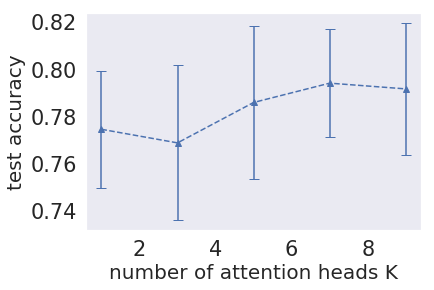

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
means = [0.7746,0.76885,0.78595,0.79413,0.7917]
variances = [0.02476, 0.03282,0.03237,0.022948,0.028]
plt.errorbar([1,3,5,7,9],means,variances,label='Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("number of attention heads K",fontsize=20)
plt.ylabel("test accuracy",fontsize=20)
plt.grid()
plt.savefig('crusher-choose-attention-headk.jpg')
plt.show()

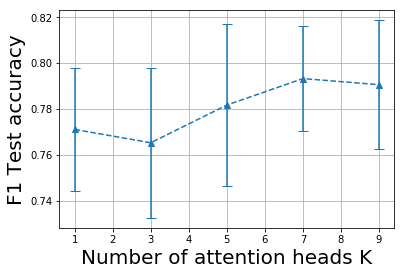

In [4]:
means = [0.771040,0.765217,0.7816814,0.793239,0.79058]
variances = [0.02689,0.03282,0.0354808,0.022948,0.028138]
plt.errorbar([1,3,5,7,9],means,variances,label='Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("Number of attention heads K",fontsize=20)
plt.ylabel("F1 Test accuracy",fontsize=20)
plt.grid()
plt.savefig('crusher-choose-attention-headk-f1.jpg')
plt.show()

In [58]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(5):
    with open('data-crusher'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('crusher-classification-attention-k7'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
    test_ls = []
    for lb in test_labels:
        if lb=='L':
            test_ls.append(1)
        else:
            test_ls.append(0)
    train_ls = []
    for lb in train_labels:
        if lb=='L':
            train_ls.append(1)
        else:
            train_ls.append(0)
    
    
    test_predictions = model.predict(np.array(test_images))
    test_f1.append(f1_score(test_ls,test_predictions>0.5,average='macro'))
    test_accuracy.append(accuracy_score(test_ls,test_predictions>0.5))
# print("Training accuracy mean",np.mean(train_accuracy))
# print("Training accuracy var",np.std(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.std(test_accuracy))

# print("Training f1 mean",np.mean(train_f1))
# print("Training f1 var",np.std(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.std(test_f1))    

loaded model
loaded model
loaded model
loaded model
loaded model
Testing accuracy mean 0.7746512407780013
Testing accuracy var 0.024769463513620388
Testing f1 mean 0.7710409271997026
Testing f1 var 0.026891796797008656


In [59]:
print(test_accuracy)

[0.7361111111111112, 0.8055555555555556, 0.7887323943661971, 0.7857142857142857, 0.7571428571428571]


In [61]:
from scipy.stats import ttest_ind
values7 = [0.8333333333333334, 0.8055555555555556, 0.7746478873239436, 0.7714285714285715, 0.7857142857142857]
values1 = [0.7361111111111112, 0.8055555555555556, 0.7887323943661971, 0.7857142857142857, 0.7571428571428571]
value, pvalue = ttest_ind(values7, values1, equal_var=True)
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

1.1540913941860234 0.2817724304050673
Samples are likely drawn from the same distributions (fail to reject H0)


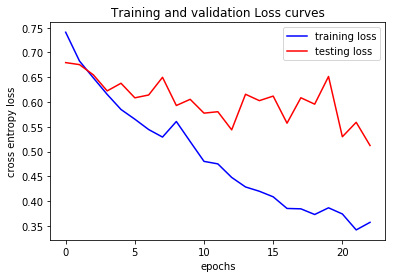

In [23]:
plt.plot(history_record[1].history['loss'][:-2],color='b',label='training loss')
plt.plot(history_record[1].history['val_loss'][:-2],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('crusher-loss-attention.jpg')
plt.show()

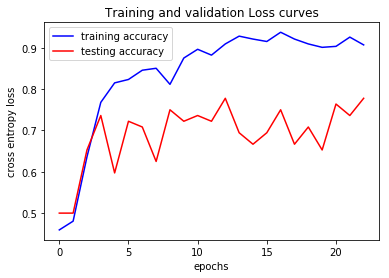

In [29]:
plt.plot(history_record[1].history['acc'][:-2],color='b',label='training accuracy')
plt.plot(history_record[1].history['val_acc'][:-2],color='r',label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('crusher-accuracy-attention.jpg')
plt.show()

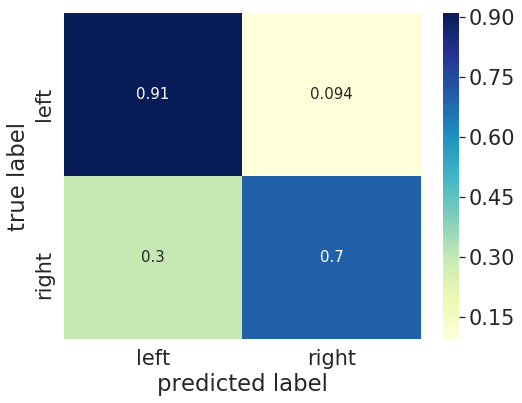

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.9)

# C_sum = np.zeros(2)

# for i in range(5):    
#     with open('data-crusher'+str(i)+'.pckl','rb') as file:
#         train_images,train_labels,test_images,test_labels = pickle.load(file)
#     with open('crusher-classification-attention-k7'+str(i)+'.hd5','rb') as f:
#         model_weights = pickle.load(f)
#         print("loaded model")
#     train_ls = []
#     for lb in train_labels:
#         if lb=='L':
#             train_ls.append(1)
#         else:
#             train_ls.append(0)
#     test_ls = []
#     for lb in test_labels:
#         if lb=='L':
#             test_ls.append(1)
#         else:
#             test_ls.append(0)
#     model.set_weights(model_weights)
#     test_predictions = model.predict(np.array(test_images))

#     C = confusion_matrix(np.array(test_ls), (test_predictions>0.5).astype(int))
#     C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(2,1)
# confusion_matrix = C_sum/5

#confusion_matrix = [[0.77,0.23],[0.18,0.82]]
confusion_matrix = [[0.91,0.094],[0.3,0.7]]

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['left','right'], 
                     columns = ['left','right'])



plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.savefig('crusher-confusion-matrix-simple.jpg')
plt.show()

In [73]:
sum(test_ls)/len(test_ls)

0.45714285714285713

loaded model
loaded model
loaded model
loaded model
loaded model


In [103]:
test_accuracy

[0.75,
 0.6805555555555556,
 0.6338028169014085,
 0.7142857142857143,
 0.7428571428571429]

Testing accuracy mean 0.7043002459199643
Testing accuracy var 0.042915053819403054
Testing f1 mean 0.6934735227113671
Testing f1 var 0.04112403654461515


In [85]:
labels = 1
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
#     if layer.name=='block5_conv1':
#         break
    layer.trainable = False
x = cnn_base.get_layer('block5_pool').output
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(labels,activation='sigmoid')(x)


model = Model(inputs=cnn_base.input, outputs=x)

sgd = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [86]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []



for i in range(5):
    print("Loading file")
    with open('data-crusher'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('crusher-classification-simple-final3'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    train_ls = []
    for lb in train_labels:
        if lb=='L':
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for lb in test_labels:
        if lb=='L':
            test_ls.append(1)
        else:
            test_ls.append(0)
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_ls),train_ls)
    checkpoint = CustomModelCheckpoint('crusher-classification-simple-final3'+str(i)+'.hd5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    earlyStopping = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    callbacks_list = [checkpoint,earlyStopping]
    history = model.fit(x=np.array(train_images),y=np.array(train_ls),batch_size=15,epochs=60,
        validation_data=(np.array(test_images),np.array(test_ls)),callbacks=callbacks_list,class_weight=class_weights)
    history_record.append(history)
    train_score = model.evaluate(x=np.array(train_images),y=np.array(train_ls),batch_size=5)
    test_score = model.evaluate(x=np.array(test_images),y=np.array(test_ls),batch_size=5)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print("predicting")
    print("Test Score",test_score)
    train_predictions = model.predict(x=np.array(train_images),batch_size=50)
    test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
    train_pred.append(train_predictions)
    test_pred.append(test_predictions)

Loading file
setting initial weights
loaded
Train on 849 samples, validate on 72 samples
Epoch 1/60
849/849 [==============================] - 12s 14ms/step - loss: 0.7098 - acc: 0.5065 - val_loss: 0.6830 - val_acc: 0.5139

Epoch 00001: val_acc improved from -inf to 0.51389, saving model to crusher-classification-simple-final30.hd5
asd
Epoch 2/60
849/849 [==============================] - 4s 4ms/step - loss: 0.6835 - acc: 0.5607 - val_loss: 0.6813 - val_acc: 0.5833

Epoch 00002: val_acc improved from 0.51389 to 0.58333, saving model to crusher-classification-simple-final30.hd5
asd
Epoch 3/60
849/849 [==============================] - 4s 4ms/step - loss: 0.6490 - acc: 0.6007 - val_loss: 0.7069 - val_acc: 0.4722

Epoch 00003: val_acc did not improve from 0.58333
Epoch 4/60
849/849 [==============================] - 4s 4ms/step - loss: 0.6449 - acc: 0.6254 - val_loss: 0.6635 - val_acc: 0.6667

Epoch 00004: val_acc improved from 0.58333 to 0.66667, saving model to crusher-classification-si


Epoch 00019: val_acc did not improve from 0.81690
Epoch 20/60
852/852 [==============================] - 4s 4ms/step - loss: 0.4600 - acc: 0.7981 - val_loss: 0.5844 - val_acc: 0.6761

Epoch 00020: val_acc did not improve from 0.81690
Epoch 21/60
852/852 [==============================] - 4s 4ms/step - loss: 0.4400 - acc: 0.7981 - val_loss: 0.5515 - val_acc: 0.7887

Epoch 00021: val_acc did not improve from 0.81690
Epoch 22/60
852/852 [==============================] - 4s 4ms/step - loss: 0.4272 - acc: 0.8239 - val_loss: 0.5394 - val_acc: 0.7606

Epoch 00022: val_acc did not improve from 0.81690
Epoch 23/60
852/852 [==============================] - 4s 4ms/step - loss: 0.4079 - acc: 0.8415 - val_loss: 0.5640 - val_acc: 0.6761

Epoch 00023: val_acc did not improve from 0.81690
Epoch 24/60
852/852 [==============================] - 4s 4ms/step - loss: 0.4127 - acc: 0.8427 - val_loss: 0.5475 - val_acc: 0.7183

Epoch 00024: val_acc did not improve from 0.81690
Epoch 25/60
852/852 [========

Epoch 2/60
855/855 [==============================] - 4s 4ms/step - loss: 0.6781 - acc: 0.5766 - val_loss: 0.6859 - val_acc: 0.5429

Epoch 00002: val_acc improved from 0.52857 to 0.54286, saving model to crusher-classification-simple-final34.hd5
asd
Epoch 3/60
855/855 [==============================] - 4s 4ms/step - loss: 0.6750 - acc: 0.5871 - val_loss: 0.6528 - val_acc: 0.6429

Epoch 00003: val_acc improved from 0.54286 to 0.64286, saving model to crusher-classification-simple-final34.hd5
asd
Epoch 4/60
855/855 [==============================] - 4s 4ms/step - loss: 0.6613 - acc: 0.6058 - val_loss: 0.6348 - val_acc: 0.6714

Epoch 00004: val_acc improved from 0.64286 to 0.67143, saving model to crusher-classification-simple-final34.hd5
asd
Epoch 5/60
855/855 [==============================] - 4s 4ms/step - loss: 0.6493 - acc: 0.5965 - val_loss: 0.6240 - val_acc: 0.6857

Epoch 00005: val_acc improved from 0.67143 to 0.68571, saving model to crusher-classification-simple-final34.hd5
asd


In [93]:
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(5):
    with open('data-crusher'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('crusher-classification-simple-final3'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
    test_ls = []
    for lb in test_labels:
        if lb=='L':
            test_ls.append(1)
        else:
            test_ls.append(0)
    train_ls = []
    for lb in train_labels:
        if lb=='L':
            train_ls.append(1)
        else:
            train_ls.append(0)
    
    
    test_predictions = model.predict(np.array(test_images))
    test_f1.append(f1_score(test_ls,test_predictions>0.5,average='macro'))
    test_accuracy.append(accuracy_score(test_ls,test_predictions>0.5))
    
    train_predictions = model.predict(np.array(train_images))
    train_f1.append(f1_score(train_ls,train_predictions>0.5,average='macro'))
    train_accuracy.append(accuracy_score(train_ls,train_predictions>0.5))

loaded model
loaded model
loaded model
loaded model
loaded model


In [94]:
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.std(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.std(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.std(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.std(test_f1))

Training accuracy mean 0.8354699710672856
Training accuracy var 0.016980571458967617
Testing accuracy mean 0.8113167896266488
Testing accuracy var 0.039801239171949394
Training f1 mean 0.8321673781226862
Training f1 var 0.019033938148006406
Testing f1 mean 0.8043615102381751
Testing f1 var 0.043921154814814754


In [89]:
test_accuracy

[0.75,
 0.8611111111111112,
 0.8169014084507042,
 0.7857142857142857,
 0.8428571428571429]

In [90]:
from scipy.stats import ttest_ind
values7 = [0.8333333333333334, 0.8055555555555556, 0.7746478873239436, 0.7714285714285715, 0.7857142857142857]
values1 = [0.75,
 0.8611111111111112,
 0.8169014084507042,
 0.7857142857142857,
 0.8428571428571429]
value, pvalue = ttest_ind(values7, values1, equal_var=True)
print(value, pvalue)
if pvalue > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')

-0.7479182170488722 0.47591803798185706
Samples are likely drawn from the same distributions (fail to reject H0)


loaded model
loaded model
loaded model
loaded model
loaded model


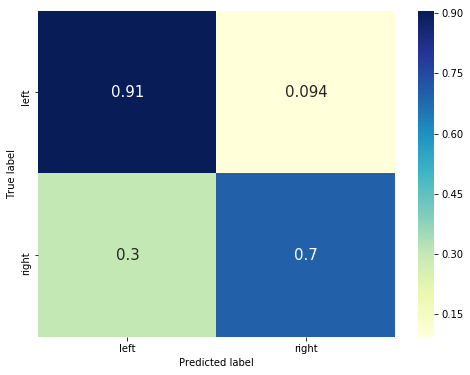

In [92]:
from sklearn.metrics import confusion_matrix

C_sum = np.zeros(2)

for i in range(5):    
    with open('data-crusher'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('crusher-classification-simple-final3'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    train_ls = []
    for lb in train_labels:
        if lb=='L':
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for lb in test_labels:
        if lb=='L':
            test_ls.append(1)
        else:
            test_ls.append(0)
    model.set_weights(model_weights)
    test_predictions = model.predict(np.array(test_images))

    C = confusion_matrix(np.array(test_ls), (test_predictions>0.5).astype(int))
    C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(2,1)
confusion_matrix = C_sum/5

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['left','right'], 
                     columns = ['left','right'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('crusher-confusion-matrix-simple.jpg')
plt.show()

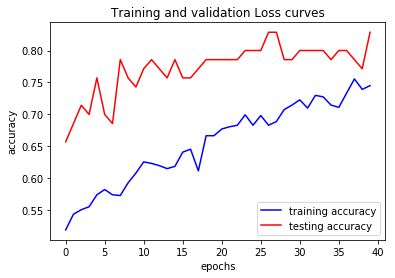

In [16]:
plt.plot(history_record[4].history['acc'],color='b',label='training accuracy')
plt.plot(history_record[4].history['val_acc'],color='r',label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('posture-accuracy-attention.jpg')
plt.show()